<a href="https://colab.research.google.com/github/senu2000/Logistic-Regression-model/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Simple Linear Regression

Task : predict the score given the number of hours spent by the student for study

Input : hours study

Output: score

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/content/student_scores.csv')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


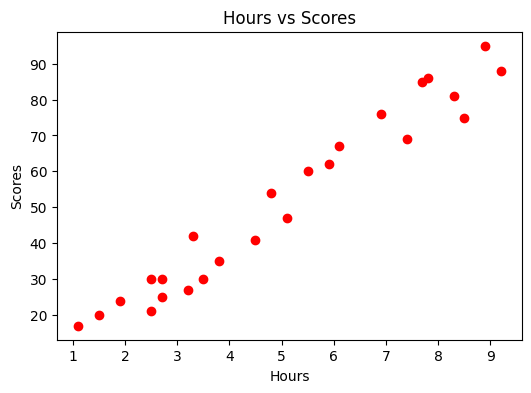

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'], 'ro')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()


# find *coeffients*

calculate the mean of te input and output

In [10]:
xmean = np.mean(df['Hours'])
ymean = np.mean(df['Scores'])

calculate the tearms needed for the numator and denominator of beta

In [11]:
df['xycov'] = (df['Hours'] - xmean) * (df['Scores'] - ymean)
df['xvar'] = (df['Hours'] - xmean)**2

In [13]:
df.head()

,Hours,Scores,xycov,xvar
0,2.5,21,76.56576,6.310144
1,5.1,47,-0.39424,0.007744
2,3.2,27,44.35776,3.283344
3,8.5,75,82.03776,12.166144
4,3.5,30,32.47776,2.286144


calculate the coeffients

In [12]:
slope = df['xycov'].sum() / df['xvar'].sum()
intercept = ymean - (slope * xmean)
print(f'slope: {slope}')
print(f'intercept: {intercept}')

slope: 9.775803390787473
intercept: 2.4836734053731817


# making prediction

In [14]:
intercept + slope * 7

70.9142971408855

In [15]:
Scores_pred = intercept + slope * df['Hours']

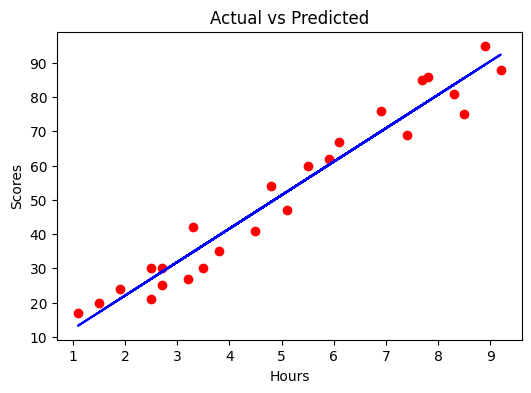

In [16]:
plt.figure(figsize=(6,4))
plt.plot(df['Hours'],df['Scores'], 'ro')
plt.plot(df['Hours'],Scores_pred, 'b-')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

# 2. Multiple Linear Regression

Task : preddict petrol consumption of a country given various factors

Input : Tax, distance of highway, avg income, population with driving license

Output : expected petrol consumption

In [17]:
df = pd.read_csv('/content/petrol_consumption.csv')

In [18]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [19]:
df.shape

(48, 5)

In [21]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.67,0.95,5.00,7.00,7.50,8.12,10.00
Average_income,48.0,4241.83,573.62,3063.00,3739.00,4298.00,4578.75,5342.00
Paved_Highways,48.0,5565.42,3491.51,431.00,3110.25,4735.50,7156.00,17782.00
Population_Driver_licence(%),48.0,0.57,0.06,0.45,0.53,0.56,0.60,0.72
Petrol_Consumption,48.0,576.77,111.89,344.00,509.50,568.50,632.75,968.00


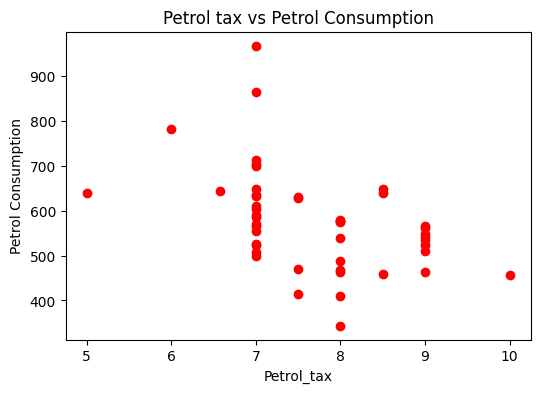

In [22]:
plt.figure(figsize=(6,4))
plt.plot(df['Petrol_tax'],df['Petrol_Consumption'], 'ro')
plt.title('Petrol tax vs Petrol Consumption')
plt.xlabel('Petrol_tax')
plt.ylabel('Petrol Consumption')
plt.show()

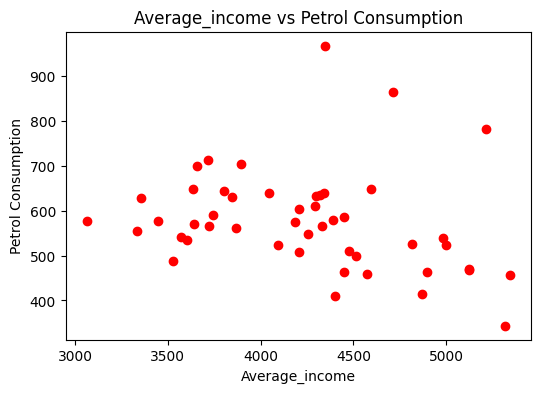

In [23]:
plt.figure(figsize=(6,4))
plt.plot(df['Average_income'],df['Petrol_Consumption'], 'ro')
plt.title('Average_income vs Petrol Consumption')
plt.xlabel('Average_income')
plt.ylabel('Petrol Consumption')
plt.show()

Train the Model

In [26]:
y = df['Petrol_Consumption']
x = df.drop('Petrol_Consumption', axis=1)

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
model.intercept_

361.45087906653225

In [30]:
model.coef_

array([-3.69937459e+01, -5.65355145e-02, -4.38217137e-03,  1.34686930e+03])

Make predictions

In [31]:
y_pred = model.predict(x_test)

In [32]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
result

,Actual,Predicted
27,631,606.692665
40,587,673.779442
26,577,584.991490
43,591,563.536910
24,460,519.058672
37,704,643.461003
12,525,572.897614
19,640,687.077036
4,410,547.609366
25,566,530.037630


In [34]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.468541282916625
Mean Squared Error: 4083.2558717453767
Root mean Squared Error: 63.90035893283681


In [35]:
model.score(x_test, y_test)

0.3913664001428886

In [36]:
model.score(x_train, y_train)

0.7068781342155135

Possible improvement :
  * Increase size of data set
  * try non-linear relation
  *may require more features